# Ridge Regression Analysis B
Author: E. Thompson-Becker

Analysis 1: Includes all independent variables: SO2,NO2,CO, O3,TEMP, PRES, DEWP, and WSPM

Analysis 2: Includes independent variables: SO2,NO2,CO, O3,

In [ ]:
#import python libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn import metrics
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#load data from csv file
data = pd.read_csv("Shunyi_norm_data.csv")

#drop RAIN as it has a low variance 
data = data.drop(['RAIN'],axis=1)

#check data output
data.head()

,Unnamed: 0,year,month,day,hour,PM25,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,WSPM
0,0,2013,3,1,0,0.001065,0.004012,0.011371,0.023438,0.020202,0.124568,0.277003,0.689781,0.244094,0.726562
1,1,2013,3,1,1,0.010650,0.010030,0.011371,0.019531,0.020202,0.133102,0.273519,0.695255,0.231496,0.734375
2,2,2013,3,1,2,0.012780,0.012036,0.011371,0.019531,0.010101,0.061979,0.263066,0.697080,0.204724,0.671875
3,3,2013,3,1,3,0.010650,0.010030,0.011371,0.011719,0.010101,0.061979,0.256098,0.717153,0.200000,0.515625
4,4,2013,3,1,4,0.010650,0.010030,0.011371,0.011719,0.010101,0.030685,0.250871,0.724453,0.206299,0.351562


## Ridge Regression
Includes all independent variables: SO2,NO2,CO, O3,TEMP, PRES, DEWP, and WSPM

In [ ]:
#setting the independent and dependent variables being used in the analysis
x = data[['SO2', 'NO2','CO','O3','TEMP','PRES','DEWP','WSPM']]
y = data['PM25']

In [ ]:
#use training and test sets found in initial analysis
#based on testing 3 months of data at a time
#describing the independent variable 
xtrain1, xtest1 = data.iloc[:2922,7:16 ], data.iloc[2922:5844, 7:16]
xtrain2, xtest2 = data.iloc[:5844,7:16 ], data.iloc[5844:8766,7:16]
xtrain3, xtest3 = data.iloc[:8766,7:16 ], data.iloc[8766:11688,7:16]
xtrain4, xtest4 = data.iloc[:11688,7:16 ], data.iloc[11688:14610,7:16 ]
xtrain5, xtest5 = data.iloc[:14610,7:16 ], data.iloc[14610:17532,7:16 ]
xtrain6, xtest6 = data.iloc[:17532,7:16 ], data.iloc[17532:20454,7:16 ]
xtrain7, xtest7 = data.iloc[:20454,7:16 ], data.iloc[20454:23376,7:16 ]
xtrain8, xtest8 = data.iloc[:23376,7:16 ], data.iloc[23376:26298,7:16 ]
xtrain9, xtest9 = data.iloc[:26298,7:16 ], data.iloc[26298:29220,7:16 ]
xtrain10, xtest10 = data.iloc[:29220,7:16 ], data.iloc[29220:32142,7:16 ]
xtrain11, xtest11 = data.iloc[:32142,7:16 ], data.iloc[32142:35063,7:16 ]

#setting the dependent variable
ytrain1, ytest1 = data.iloc[:2922,5 ], data.iloc[2922:5844,5 ]
ytrain2, ytest2 = data.iloc[:5844, 5], data.iloc[5844:8766, 5]
ytrain3, ytest3 = data.iloc[:8766,5 ], data.iloc[8766:11688, 5]
ytrain4, ytest4 = data.iloc[:11688,5 ], data.iloc[11688:14610,5 ]
ytrain5, ytest5 = data.iloc[:14610,5 ], data.iloc[14610:17532, 5]
ytrain6, ytest6 = data.iloc[:17532,5 ], data.iloc[17532:20454,5 ]
ytrain7, ytest7 = data.iloc[:20454,5 ], data.iloc[20454:23376,5 ]
ytrain8, ytest8 = data.iloc[:23376,5 ], data.iloc[23376:26298,5 ]
ytrain9, ytest9 = data.iloc[:26298, 5], data.iloc[26298:29220,5 ]
ytrain10, ytest10 = data.iloc[:29220,5 ], data.iloc[29220:32142,5 ]
ytrain11, ytest11 = data.iloc[:32142,5 ], data.iloc[32142:35063, 5]


Use TimeSeriesSplit to split the data, and RidgeCV in order to find the best alpha for the regression model. 

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits = 11, max_train_size=2922, test_size = 2922)

model = RidgeCV(alphas=np.arange(0, 1, 0.01), cv=tscv, scoring='neg_mean_absolute_error')

#fit model
model.fit(x, y)

#display lambda that produced the lowest test MSE
print(model.alpha_)



0.99


Create the regression model for the first set of training and test data, using alpha = 0.99. 

In [ ]:
model = Ridge(alpha = 0.99)
model.fit(xtrain1,ytrain1)
ypred1 = model.predict(xtest1)
#Actual value and the predicted value
mod_diff = pd.DataFrame({'Actual value': ytest1, 'Predicted value': ypred1})
mod_diff

,Actual value,Predicted value
2922,0.200213,0.148336
2923,0.241747,0.161269
2924,0.279020,0.158062
2925,0.279020,0.148793
2926,0.236422,0.119472
...,...,...
5839,0.019169,0.039924
5840,0.007455,0.039842
5841,0.033014,0.047360
5842,0.027689,0.022227


In [ ]:
#use evaluation metrics to check if the regression fits 
meanAbErr1 = metrics.mean_absolute_error(ytest1, ypred1)
meanSqErr1 = metrics.mean_squared_error(ytest1, ypred1)
rootMeanSqErr1 = np.sqrt(metrics.mean_squared_error(ytest1, ypred1))
meanAbsPer1 = metrics.mean_absolute_percentage_error(ytest1, ypred1)
r2_1 = metrics.r2_score(ytest1,ypred1)
Adj_r21 = 1-(1-r2_1)*(len(xtrain1)-1)/(len(xtrain1)-9-1)
print('R squared:', r2_1)
print('Adjusted R squared:',Adj_r21)
print('Mean Absolute Error:', meanAbErr1)
print('Mean Absolute Percentage Error: {:.2f}'.format(meanAbsPer1))
print('Mean Square Error:', meanSqErr1)
print('Root Mean Square Error:', rootMeanSqErr1)

R squared: 0.2728268993169263
Adjusted R squared: 0.270579454981024
Mean Absolute Error: 0.047827908317279476
Mean Absolute Percentage Error: 2.74
Mean Square Error: 0.003710845854195526
Root Mean Square Error: 0.06091671243752018


In [ ]:
model2 = Ridge(alpha = 0.99)
model2.fit(xtrain2,ytrain2)
ypred2 = model.predict(xtest2)

#use evaluation metrics to check if the regression fits 
meanAbErr2 = metrics.mean_absolute_error(ytest2, ypred2)
meanSqErr2 = metrics.mean_squared_error(ytest2, ypred2)
rootMeanSqErr2 = np.sqrt(metrics.mean_squared_error(ytest2, ypred2))
meanAbsPer2 = metrics.mean_absolute_percentage_error(ytest2, ypred2)
r2_2 = metrics.r2_score(ytest2,ypred2)
Adj_r22 = 1-(1-r2_2)*(len(xtrain2)-1)/(len(xtrain2)-9-1)


In [ ]:
model3 = Ridge(alpha = 0.99)
model3.fit(xtrain3,ytrain3)
ypred3 = model.predict(xtest3)

#use evaluation metrics to check if the regression fits 
meanAbErr3 = metrics.mean_absolute_error(ytest3, ypred3)
meanSqErr3 = metrics.mean_squared_error(ytest3, ypred3)
rootMeanSqErr3 = np.sqrt(metrics.mean_squared_error(ytest3, ypred3))
meanAbsPer3 = metrics.mean_absolute_percentage_error(ytest3, ypred3)
r2_3 = metrics.r2_score(ytest3,ypred3)
Adj_r23 = 1-(1-r2_3)*(len(xtrain3)-1)/(len(xtrain3)-9-1)


In [ ]:
model4 = Ridge(alpha = 0.99)
model4.fit(xtrain4,ytrain4)
ypred4 = model.predict(xtest4)

#use evaluation metrics to check if the regression fits 
meanAbErr4 = metrics.mean_absolute_error(ytest4, ypred4)
meanSqErr4 = metrics.mean_squared_error(ytest4, ypred4)
rootMeanSqErr4 = np.sqrt(metrics.mean_squared_error(ytest4, ypred4))
meanAbsPer4 = metrics.mean_absolute_percentage_error(ytest4, ypred4)
r2_4 = metrics.r2_score(ytest4,ypred4)
Adj_r24 = 1-(1-r2_4)*(len(xtrain4)-1)/(len(xtrain4)-9-1)


In [ ]:
model5 = Ridge(alpha = 0.99)
model5.fit(xtrain5,ytrain5)
ypred5 = model.predict(xtest5)

#use evaluation metrics to check if the regression fits 
meanAbErr5 = metrics.mean_absolute_error(ytest5, ypred5)
meanSqErr5 = metrics.mean_squared_error(ytest5, ypred5)
rootMeanSqErr5 = np.sqrt(metrics.mean_squared_error(ytest5, ypred5))
meanAbsPer5 = metrics.mean_absolute_percentage_error(ytest5, ypred5)
r2_5 = metrics.r2_score(ytest5,ypred5)
Adj_r25 = 1-(1-r2_5)*(len(xtrain5)-1)/(len(xtrain5)-9-1)


In [ ]:
model6 = Ridge(alpha = 0.99)
model6.fit(xtrain6,ytrain6)
ypred6 = model.predict(xtest6)

#use evaluation metrics to check if the regression fits 
meanAbErr6 = metrics.mean_absolute_error(ytest6, ypred6)
meanSqErr6 = metrics.mean_squared_error(ytest6, ypred6)
rootMeanSqErr6 = np.sqrt(metrics.mean_squared_error(ytest6, ypred6))
meanAbsPer6 = metrics.mean_absolute_percentage_error(ytest6, ypred6)
r2_6 = metrics.r2_score(ytest6,ypred6)
Adj_r26 = 1-(1-r2_6)*(len(xtrain6)-1)/(len(xtrain6)-9-1)


In [ ]:
model7 = Ridge(alpha = 0.99)
model7.fit(xtrain7,ytrain7)
ypred7 = model.predict(xtest7)

#use evaluation metrics to check if the regression fits 
meanAbErr7 = metrics.mean_absolute_error(ytest7, ypred7)
meanSqErr7 = metrics.mean_squared_error(ytest7, ypred7)
rootMeanSqErr7 = np.sqrt(metrics.mean_squared_error(ytest7, ypred7))
meanAbsPer7 = metrics.mean_absolute_percentage_error(ytest7, ypred7)
r2_7 = metrics.r2_score(ytest7,ypred7)
Adj_r27 = 1-(1-r2_7)*(len(xtrain7)-1)/(len(xtrain7)-9-1)


In [ ]:
model8 = Ridge(alpha = 0.99)
model8.fit(xtrain8,ytrain8)
ypred8 = model.predict(xtest8)

#use evaluation metrics to check if the regression fits 
meanAbErr8 = metrics.mean_absolute_error(ytest8, ypred8)
meanSqErr8 = metrics.mean_squared_error(ytest8, ypred8)
rootMeanSqErr8 = np.sqrt(metrics.mean_squared_error(ytest8, ypred8))
meanAbsPer8 = metrics.mean_absolute_percentage_error(ytest8, ypred8)
r2_8 = metrics.r2_score(ytest8,ypred8)
Adj_r28 = 1-(1-r2_8)*(len(xtrain8)-1)/(len(xtrain8)-9-1)


In [ ]:
model9 = Ridge(alpha = 0.99)
model9.fit(xtrain9,ytrain9)
ypred9 = model.predict(xtest9)

#use evaluation metrics to check if the regression fits 
meanAbErr9 = metrics.mean_absolute_error(ytest9, ypred9)
meanSqErr9 = metrics.mean_squared_error(ytest9, ypred9)
rootMeanSqErr9 = np.sqrt(metrics.mean_squared_error(ytest9, ypred9))
meanAbsPer9 = metrics.mean_absolute_percentage_error(ytest9, ypred9)
r2_9 = metrics.r2_score(ytest9,ypred9)
Adj_r29 = 1-(1-r2_9)*(len(xtrain9)-1)/(len(xtrain9)-9-1)


In [ ]:
model10 = Ridge(alpha = 0.99)
model10.fit(xtrain10,ytrain10)
ypred10 = model.predict(xtest10)

#use evaluation metrics to check if the regression fits 
meanAbErr10 = metrics.mean_absolute_error(ytest10, ypred10)
meanSqErr10 = metrics.mean_squared_error(ytest10, ypred10)
rootMeanSqErr10 = np.sqrt(metrics.mean_squared_error(ytest10, ypred10))
meanAbsPer10 = metrics.mean_absolute_percentage_error(ytest10, ypred10)
r2_10 = metrics.r2_score(ytest10,ypred10)
Adj_r210 = 1-(1-r2_10)*(len(xtrain10)-1)/(len(xtrain10)-9-1)


In [ ]:
model11 = Ridge(alpha = 0.99)
model11.fit(xtrain11,ytrain11)
ypred11 = model.predict(xtest11)

#use evaluation metrics to check if the regression fits 
meanAbErr11 = metrics.mean_absolute_error(ytest11, ypred11)
meanSqErr11 = metrics.mean_squared_error(ytest11, ypred11)
rootMeanSqErr11 = np.sqrt(metrics.mean_squared_error(ytest11, ypred11))
meanAbsPer11 = metrics.mean_absolute_percentage_error(ytest11, ypred11)
r2_11 = metrics.r2_score(ytest11,ypred11)
Adj_r211 = 1-(1-r2_11)*(len(xtrain11)-1)/(len(xtrain11)-9-1)


In [ ]:
#print all calculated evaluation metrics into a table to compare
trial = [1,2,3,4,5,6,7,8,9,10,11]
rsquared = [model.score(x,y)*100, model2.score(x,y)*100, model3.score(x,y)*100,model4.score(x,y)*100,model5.score(x,y)*100,model6.score(x,y)*100,model7.score(x,y)*100,model8.score(x,y)*100,model9.score(x,y)*100,model10.score(x,y)*100,model11.score(x,y)*100]
MAE = [meanAbErr1,meanAbErr2,meanAbErr3,meanAbErr4,meanAbErr5,meanAbErr6,meanAbErr7,meanAbErr8,meanAbErr9,meanAbErr10,meanAbErr11]
MSE = [meanSqErr1,meanSqErr2,meanSqErr3,meanSqErr4,meanSqErr5,meanSqErr6,meanSqErr7,meanSqErr8,meanSqErr9,meanSqErr10,meanSqErr11]
RMSE = [rootMeanSqErr1,rootMeanSqErr2,rootMeanSqErr3,rootMeanSqErr4,rootMeanSqErr5,rootMeanSqErr6,rootMeanSqErr7,rootMeanSqErr8,rootMeanSqErr9,rootMeanSqErr10,rootMeanSqErr11]
MAPE = [meanAbsPer1,meanAbsPer2,meanAbsPer3,meanAbsPer4,meanAbsPer5,meanAbsPer6, meanAbsPer7, meanAbsPer8, meanAbsPer9, meanAbsPer10, meanAbsPer11]
R2 = [r2_1,r2_2, r2_3, r2_4, r2_5, r2_6, r2_7, r2_8, r2_9, r2_10, r2_11]
adjR2 = [Adj_r21,Adj_r22,Adj_r23,Adj_r24,Adj_r25,Adj_r26,Adj_r27,Adj_r28,Adj_r29,Adj_r210,Adj_r211]
results = pd.DataFrame({'Trial': trial, 'R-Squared': R2,'Adjusted R2':adjR2, 'Mean Absolute Error':MAE, 'Mean Absolute Percentage Error':MAPE, 'Mean Square Error': MSE, 'Root Mean Square Error': RMSE})
results

,Trial,R-Squared,Adjusted R2,Mean Absolute Error,Mean Absolute Percentage Error,Mean Square Error,Root Mean Square Error
0,1,0.272827,0.270579,0.047828,2.735699e+00,0.003711,0.060917
1,2,0.752359,0.751977,0.034283,1.398804e+00,0.002959,0.054398
2,3,0.450270,0.449705,0.037958,1.483915e+00,0.002488,0.049884
3,4,0.572031,0.571701,0.035612,1.221932e+00,0.002336,0.048333
4,5,0.733537,0.733373,0.033440,1.813496e+00,0.002296,0.047919
5,6,0.225669,0.225272,0.035620,1.505051e+00,0.003003,0.054803
6,7,0.495230,0.495008,0.035286,1.640572e+00,0.002213,0.047048
7,8,0.812924,0.812852,0.031302,1.191693e+00,0.002937,0.054193
8,9,0.573175,0.573029,0.037812,1.914327e+00,0.002947,0.054286
9,10,0.404983,0.404799,0.033130,1.585298e+00,0.001924,0.043864


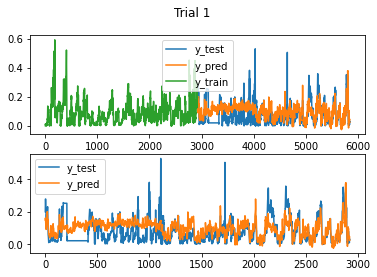

In [ ]:
plt.subplot(2,1, 1)
plt.plot(np.arange(len(ypred1)) + len(ytrain1),ytest1)
plt.plot(np.arange(len(ypred1)) + len(ytrain1), ypred1)
plt.plot(ytrain1)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred', 'y_train'])

plt.subplot(2,1,2)
#plot the predicted values
plt.plot(np.arange(len(ypred1)),ytest1)
plt.plot(np.arange(len(ypred1)), ypred1)

# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred'])

plt.suptitle("Trial 1")
plt.show()

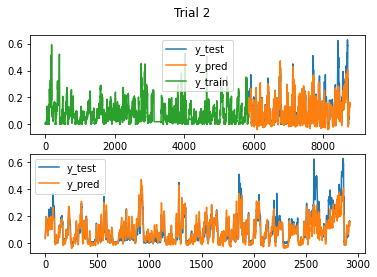

In [ ]:
plt.subplot(2,1, 1)
plt.plot(np.arange(len(ypred2)) + len(ytrain2),ytest2)
plt.plot(np.arange(len(ypred2)) + len(ytrain2), ypred2)
plt.plot(ytrain2)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred', 'y_train'])

plt.subplot(2,1,2)
#plot the predicted values
plt.plot(np.arange(len(ypred2)),ytest2)
plt.plot(np.arange(len(ypred2)), ypred2)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred'])

plt.suptitle('Trial 2')
plt.show()

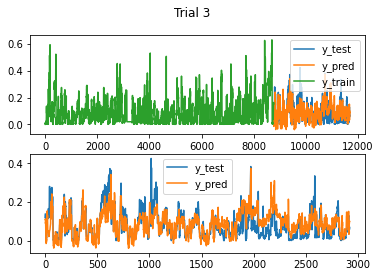

In [ ]:
plt.subplot(2,1, 1)
plt.plot(np.arange(len(ypred3)) + len(ytrain3),ytest3)
plt.plot(np.arange(len(ypred3)) + len(ytrain3), ypred3)
plt.plot(ytrain3)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred', 'y_train'])

plt.subplot(2,1,2)
#plot the predicted values
plt.plot(np.arange(len(ypred3)),ytest3)
plt.plot(np.arange(len(ypred3)), ypred3)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred'])

plt.suptitle('Trial 3')
plt.show()

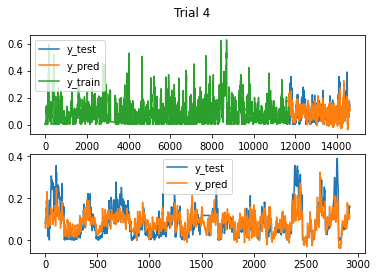

In [ ]:
plt.subplot(2,1, 1)
plt.plot(np.arange(len(ypred4)) + len(ytrain4),ytest4)
plt.plot(np.arange(len(ypred4)) + len(ytrain4), ypred4)
plt.plot(ytrain4)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred', 'y_train'])

plt.subplot(2,1,2)
#plot the predicted values
plt.plot(np.arange(len(ypred4)),ytest4)
plt.plot(np.arange(len(ypred4)), ypred4)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred'])

plt.suptitle('Trial 4')
plt.show()

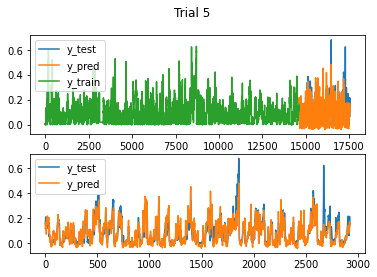

In [ ]:
plt.subplot(2,1, 1)
plt.plot(np.arange(len(ypred5)) + len(ytrain5),ytest5)
plt.plot(np.arange(len(ypred5)) + len(ytrain5), ypred5)
plt.plot(ytrain5)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred', 'y_train'])

plt.subplot(2,1,2)
#plot the predicted values
plt.plot(np.arange(len(ypred5)),ytest5)
plt.plot(np.arange(len(ypred5)), ypred5)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred'])

plt.suptitle('Trial 5')
plt.show()

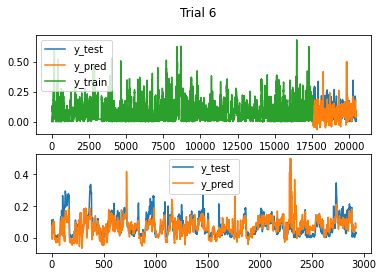

In [ ]:
#trial 6
plt.subplot(2,1, 1)
plt.plot(np.arange(len(ypred6)) + len(ytrain6),ytest6)
plt.plot(np.arange(len(ypred6)) + len(ytrain6), ypred6)
plt.plot(ytrain6)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred', 'y_train'])

plt.subplot(2,1,2)
#plot the predicted values
plt.plot(np.arange(len(ypred6)),ytest6)
plt.plot(np.arange(len(ypred6)), ypred6)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred'])

plt.suptitle('Trial 6')
plt.show()

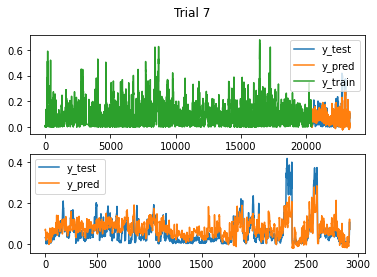

In [ ]:
#trial 7
plt.subplot(2,1, 1)
plt.plot(np.arange(len(ypred7)) + len(ytrain7),ytest7)
plt.plot(np.arange(len(ypred7)) + len(ytrain7), ypred7)
plt.plot(ytrain7)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred', 'y_train'])

plt.subplot(2,1,2)
#plot the predicted values
plt.plot(np.arange(len(ypred7)),ytest7)
plt.plot(np.arange(len(ypred7)), ypred7)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred'])

plt.suptitle('Trial 7')
plt.show()

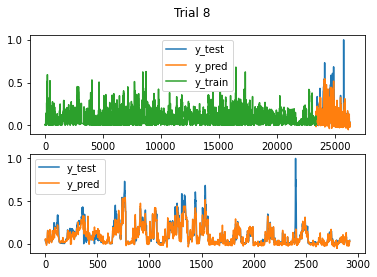

In [ ]:
#trial 8
plt.subplot(2,1, 1)
plt.plot(np.arange(len(ypred8)) + len(ytrain8),ytest8)
plt.plot(np.arange(len(ypred8)) + len(ytrain8), ypred8)
plt.plot(ytrain8)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred', 'y_train'])

plt.subplot(2,1,2)
#plot the predicted values
plt.plot(np.arange(len(ypred8)),ytest8)
plt.plot(np.arange(len(ypred8)), ypred8)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred'])

plt.suptitle('Trial 8')
plt.show()

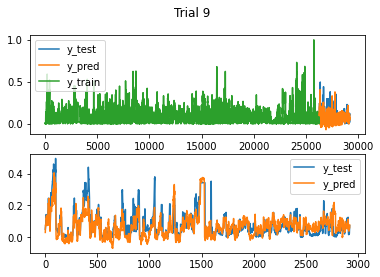

In [ ]:
#trial 9
plt.subplot(2,1, 1)
plt.plot(np.arange(len(ypred9)) + len(ytrain9),ytest9)
plt.plot(np.arange(len(ypred9)) + len(ytrain9), ypred9)
plt.plot(ytrain9)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred', 'y_train'])

plt.subplot(2,1,2)
#plot the predicted values
plt.plot(np.arange(len(ypred9)),ytest9)
plt.plot(np.arange(len(ypred9)), ypred9)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred'])

plt.suptitle('Trial 9')
plt.show()

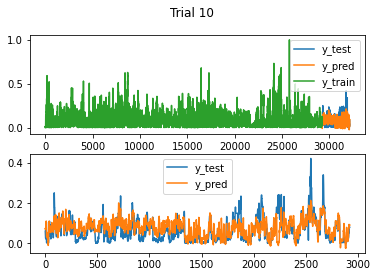

In [ ]:
#trial 10
plt.subplot(2,1, 1)
plt.plot(np.arange(len(ypred10)) + len(ytrain10),ytest10)
plt.plot(np.arange(len(ypred10)) + len(ytrain10), ypred10)
plt.plot(ytrain10)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred', 'y_train'])

plt.subplot(2,1,2)
#plot the predicted values
plt.plot(np.arange(len(ypred10)),ytest10)
plt.plot(np.arange(len(ypred10)), ypred10)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred'])

plt.suptitle('Trial 10')
plt.show()

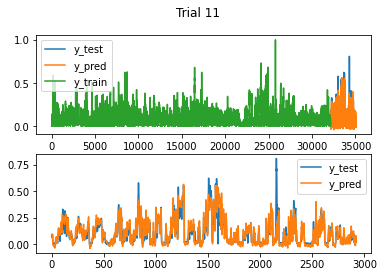

In [ ]:
#trial 11
plt.subplot(2,1, 1)
plt.plot(np.arange(len(ypred11)) + len(ytrain11),ytest11)
plt.plot(np.arange(len(ypred11)) + len(ytrain11), ypred11)
plt.plot(ytrain11)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred', 'y_train'])

plt.subplot(2,1,2)
#plot the predicted values
plt.plot(np.arange(len(ypred11)),ytest11)
plt.plot(np.arange(len(ypred11)), ypred11)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred'])

plt.suptitle('Trial 11')
plt.show()

## Ridge Regression Anaysis 2
Includes independent variables: SO2, NO2, CO, and O3

In [ ]:
#setting the independent and dependent variables being used in the analysis
x_2 = data[['SO2', 'NO2','CO','O3']]
y_2 = data['PM25']

In [ ]:
#use training and test sets found in initial analysis
#based on testing 3 months of data at a time
#describing the independent variable 
xtrain1, xtest1 = data.iloc[:2922,7:11 ], data.iloc[2922:5844, 7:11]
xtrain2, xtest2 = data.iloc[:5844,7:11 ], data.iloc[5844:8766,7:11]
xtrain3, xtest3 = data.iloc[:8766,7:11 ], data.iloc[8766:11688,7:11]
xtrain4, xtest4 = data.iloc[:11688,7:11 ], data.iloc[11688:14610,7:11 ]
xtrain5, xtest5 = data.iloc[:14610,7:11 ], data.iloc[14610:17532,7:11 ]
xtrain6, xtest6 = data.iloc[:17532,7:11 ], data.iloc[17532:20454,7:11 ]
xtrain7, xtest7 = data.iloc[:20454,7:11 ], data.iloc[20454:23376,7:11 ]
xtrain8, xtest8 = data.iloc[:23376,7:11 ], data.iloc[23376:26298,7:11 ]
xtrain9, xtest9 = data.iloc[:26298,7:11 ], data.iloc[26298:29220,7:11 ]
xtrain10, xtest10 = data.iloc[:29220,7:11 ], data.iloc[29220:32142,7:11 ]
xtrain11, xtest11 = data.iloc[:32142,7:11 ], data.iloc[32142:35063,7:11 ]

#setting the dependent variable
ytrain1, ytest1 = data.iloc[:2922,5 ], data.iloc[2922:5844,5 ]
ytrain2, ytest2 = data.iloc[:5844, 5], data.iloc[5844:8766, 5]
ytrain3, ytest3 = data.iloc[:8766,5 ], data.iloc[8766:11688, 5]
ytrain4, ytest4 = data.iloc[:11688,5 ], data.iloc[11688:14610,5 ]
ytrain5, ytest5 = data.iloc[:14610,5 ], data.iloc[14610:17532, 5]
ytrain6, ytest6 = data.iloc[:17532,5 ], data.iloc[17532:20454,5 ]
ytrain7, ytest7 = data.iloc[:20454,5 ], data.iloc[20454:23376,5 ]
ytrain8, ytest8 = data.iloc[:23376,5 ], data.iloc[23376:26298,5 ]
ytrain9, ytest9 = data.iloc[:26298, 5], data.iloc[26298:29220,5 ]
ytrain10, ytest10 = data.iloc[:29220,5 ], data.iloc[29220:32142,5 ]
ytrain11, ytest11 = data.iloc[:32142,5 ], data.iloc[32142:35063, 5]


Use TimeSeriesSplit to split the data, and RidgeCV in order to find the best alpha for the regression model. 

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits = 11, max_train_size=2922, test_size = 2922)

model = RidgeCV(alphas=np.arange(0, 1, 0.01), cv=tscv, scoring='neg_mean_absolute_error')

#fit model
model.fit(x_2, y_2)

#display lambda that produced the lowest test MSE
print(model.alpha_)

0.99


Create the regression model for the first set of training and test data, using alpha = 0.99. 

In [ ]:
model = Ridge(alpha = 0.99)
model.fit(xtrain1,ytrain1)
ypred1 = model.predict(xtest1)
#Actual value and the predicted value
mod_diff = pd.DataFrame({'Actual value': ytest1, 'Predicted value': ypred1})
mod_diff

,Actual value,Predicted value
2922,0.200213,0.126613
2923,0.241747,0.148991
2924,0.279020,0.140733
2925,0.279020,0.131067
2926,0.236422,0.094543
...,...,...
5839,0.019169,0.036463
5840,0.007455,0.039066
5841,0.033014,0.059530
5842,0.027689,0.037300


In [ ]:
#use evaluation metrics to check if the regression fits 
meanAbErr1 = metrics.mean_absolute_error(ytest1, ypred1)
meanSqErr1 = metrics.mean_squared_error(ytest1, ypred1)
rootMeanSqErr1 = np.sqrt(metrics.mean_squared_error(ytest1, ypred1))
meanAbsPer1 = metrics.mean_absolute_percentage_error(ytest1, ypred1)
r2_1 = metrics.r2_score(ytest1,ypred1)
Adj_r21 = 1-(1-r2_1)*(len(xtrain1)-1)/(len(xtrain1)-5-1)
print('R squared:', r2_1)
print('Adjusted R squared:',Adj_r21)
print('Mean Absolute Error:', meanAbErr1)
print('Mean Absolute Percentage Error: {:.2f}'.format(meanAbsPer1))
print('Mean Square Error:', meanSqErr1)
print('Root Mean Square Error:', rootMeanSqErr1)

R squared: 0.3456332600906221
Adjusted R squared: 0.3445112320729449
Mean Absolute Error: 0.042287817558536465
Mean Absolute Percentage Error: 2.24
Mean Square Error: 0.003339306833043142
Root Mean Square Error: 0.057786735788095366


In [ ]:
model2 = Ridge(alpha = 0.99)
model2.fit(xtrain2,ytrain2)
ypred2 = model.predict(xtest2)

#use evaluation metrics to check if the regression fits 
meanAbErr2 = metrics.mean_absolute_error(ytest2, ypred2)
meanSqErr2 = metrics.mean_squared_error(ytest2, ypred2)
rootMeanSqErr2 = np.sqrt(metrics.mean_squared_error(ytest2, ypred2))
meanAbsPer2 = metrics.mean_absolute_percentage_error(ytest2, ypred2)
r2_2 = metrics.r2_score(ytest2,ypred2)
Adj_r22 = 1-(1-r2_2)*(len(xtrain2)-1)/(len(xtrain2)-5-1)

In [ ]:
model3 = Ridge(alpha = 0.99)
model3.fit(xtrain3,ytrain3)
ypred3 = model.predict(xtest3)

#use evaluation metrics to check if the regression fits 
meanAbErr3 = metrics.mean_absolute_error(ytest3, ypred3)
meanSqErr3 = metrics.mean_squared_error(ytest3, ypred3)
rootMeanSqErr3 = np.sqrt(metrics.mean_squared_error(ytest3, ypred3))
meanAbsPer3 = metrics.mean_absolute_percentage_error(ytest3, ypred3)
r2_3 = metrics.r2_score(ytest3,ypred3)
Adj_r23 = 1-(1-r2_3)*(len(xtrain3)-1)/(len(xtrain3)-5-1)

In [ ]:
model4 = Ridge(alpha = 0.99)
model4.fit(xtrain4,ytrain4)
ypred4 = model.predict(xtest4)

#use evaluation metrics to check if the regression fits 
meanAbErr4 = metrics.mean_absolute_error(ytest4, ypred4)
meanSqErr4 = metrics.mean_squared_error(ytest4, ypred4)
rootMeanSqErr4 = np.sqrt(metrics.mean_squared_error(ytest4, ypred4))
meanAbsPer4 = metrics.mean_absolute_percentage_error(ytest4, ypred4)
r2_4 = metrics.r2_score(ytest4,ypred4)
Adj_r24 = 1-(1-r2_4)*(len(xtrain4)-1)/(len(xtrain4)-5-1)

In [ ]:
model5 = Ridge(alpha = 0.99)
model5.fit(xtrain5,ytrain5)
ypred5 = model.predict(xtest5)

#use evaluation metrics to check if the regression fits 
meanAbErr5 = metrics.mean_absolute_error(ytest5, ypred5)
meanSqErr5 = metrics.mean_squared_error(ytest5, ypred5)
rootMeanSqErr5 = np.sqrt(metrics.mean_squared_error(ytest5, ypred5))
meanAbsPer5 = metrics.mean_absolute_percentage_error(ytest5, ypred5)
r2_5 = metrics.r2_score(ytest5,ypred5)
Adj_r25 = 1-(1-r2_5)*(len(xtrain5)-1)/(len(xtrain5)-9-1)

In [ ]:
model6 = Ridge(alpha = 0.99)
model6.fit(xtrain6,ytrain6)
ypred6 = model.predict(xtest6)

#use evaluation metrics to check if the regression fits 
meanAbErr6 = metrics.mean_absolute_error(ytest6, ypred6)
meanSqErr6 = metrics.mean_squared_error(ytest6, ypred6)
rootMeanSqErr6 = np.sqrt(metrics.mean_squared_error(ytest6, ypred6))
meanAbsPer6 = metrics.mean_absolute_percentage_error(ytest6, ypred6)
r2_6 = metrics.r2_score(ytest6,ypred6)
Adj_r26 = 1-(1-r2_6)*(len(xtrain6)-1)/(len(xtrain6)-5-1)


In [ ]:
model7 = Ridge(alpha = 0.99)
model7.fit(xtrain7,ytrain7)
ypred7 = model.predict(xtest7)

#use evaluation metrics to check if the regression fits 
meanAbErr7 = metrics.mean_absolute_error(ytest7, ypred7)
meanSqErr7 = metrics.mean_squared_error(ytest7, ypred7)
rootMeanSqErr7 = np.sqrt(metrics.mean_squared_error(ytest7, ypred7))
meanAbsPer7 = metrics.mean_absolute_percentage_error(ytest7, ypred7)
r2_7 = metrics.r2_score(ytest7,ypred7)
Adj_r27 = 1-(1-r2_7)*(len(xtrain7)-1)/(len(xtrain7)-5-1)

In [ ]:
model8 = Ridge(alpha = 0.99)
model8.fit(xtrain8,ytrain8)
ypred8 = model.predict(xtest8)

#use evaluation metrics to check if the regression fits 
meanAbErr8 = metrics.mean_absolute_error(ytest8, ypred8)
meanSqErr8 = metrics.mean_squared_error(ytest8, ypred8)
rootMeanSqErr8 = np.sqrt(metrics.mean_squared_error(ytest8, ypred8))
meanAbsPer8 = metrics.mean_absolute_percentage_error(ytest8, ypred8)
r2_8 = metrics.r2_score(ytest8,ypred8)
Adj_r28 = 1-(1-r2_8)*(len(xtrain8)-1)/(len(xtrain8)-5-1)


In [ ]:
model9 = Ridge(alpha = 0.99)
model9.fit(xtrain9,ytrain9)
ypred9 = model.predict(xtest9)

#use evaluation metrics to check if the regression fits 
meanAbErr9 = metrics.mean_absolute_error(ytest9, ypred9)
meanSqErr9 = metrics.mean_squared_error(ytest9, ypred9)
rootMeanSqErr9 = np.sqrt(metrics.mean_squared_error(ytest9, ypred9))
meanAbsPer9 = metrics.mean_absolute_percentage_error(ytest9, ypred9)
r2_9 = metrics.r2_score(ytest9,ypred9)
Adj_r29 = 1-(1-r2_9)*(len(xtrain9)-1)/(len(xtrain9)-5-1)


In [ ]:
model10 = Ridge(alpha = 0.99)
model10.fit(xtrain10,ytrain10)
ypred10 = model.predict(xtest10)

#use evaluation metrics to check if the regression fits 
meanAbErr10 = metrics.mean_absolute_error(ytest10, ypred10)
meanSqErr10 = metrics.mean_squared_error(ytest10, ypred10)
rootMeanSqErr10 = np.sqrt(metrics.mean_squared_error(ytest10, ypred10))
meanAbsPer10 = metrics.mean_absolute_percentage_error(ytest10, ypred10)
r2_10 = metrics.r2_score(ytest10,ypred10)
Adj_r210 = 1-(1-r2_10)*(len(xtrain10)-1)/(len(xtrain10)-5-1)

In [ ]:
model11 = Ridge(alpha = 0.99)
model11.fit(xtrain11,ytrain11)
ypred11 = model.predict(xtest11)

#use evaluation metrics to check if the regression fits 
meanAbErr11 = metrics.mean_absolute_error(ytest11, ypred11)
meanSqErr11 = metrics.mean_squared_error(ytest11, ypred11)
rootMeanSqErr11 = np.sqrt(metrics.mean_squared_error(ytest11, ypred11))
meanAbsPer11 = metrics.mean_absolute_percentage_error(ytest11, ypred11)
r2_11 = metrics.r2_score(ytest11,ypred11)
Adj_r211 = 1-(1-r2_11)*(len(xtrain11)-1)/(len(xtrain11)-9-1)

In [ ]:
#print all calculated evaluation metrics into a table to compare
trial = [1,2,3,4,5,6,7,8,9,10,11]
MAE = [meanAbErr1,meanAbErr2,meanAbErr3,meanAbErr4,meanAbErr5,meanAbErr6,meanAbErr7,meanAbErr8,meanAbErr9,meanAbErr10,meanAbErr11]
MSE = [meanSqErr1,meanSqErr2,meanSqErr3,meanSqErr4,meanSqErr5,meanSqErr6,meanSqErr7,meanSqErr8,meanSqErr9,meanSqErr10,meanSqErr11]
RMSE = [rootMeanSqErr1,rootMeanSqErr2,rootMeanSqErr3,rootMeanSqErr4,rootMeanSqErr5,rootMeanSqErr6,rootMeanSqErr7,rootMeanSqErr8,rootMeanSqErr9,rootMeanSqErr10,rootMeanSqErr11]
MAPE = [meanAbsPer1,meanAbsPer2,meanAbsPer3,meanAbsPer4,meanAbsPer5,meanAbsPer6, meanAbsPer7, meanAbsPer8, meanAbsPer9, meanAbsPer10, meanAbsPer11]
R2 = [r2_1,r2_2, r2_3, r2_4, r2_5, r2_6, r2_7, r2_8, r2_9, r2_10, r2_11]
adjR2 = [Adj_r21,Adj_r22,Adj_r23,Adj_r24,Adj_r25,Adj_r26,Adj_r27,Adj_r28,Adj_r29,Adj_r210,Adj_r211]
results = pd.DataFrame({'Trial': trial, 'R-Squared': R2,'Adjusted R2':adjR2, 'Mean Absolute Error':MAE, 'Mean Absolute Percentage Error':MAPE, 'Mean Square Error': MSE, 'Root Mean Square Error': RMSE})
results

,Trial,R-Squared,Adjusted R2,Mean Absolute Error,Mean Absolute Percentage Error,Mean Square Error,Root Mean Square Error
0,1,0.345633,0.344511,0.042288,2.235236e+00,0.003339,0.057787
1,2,0.716835,0.716592,0.040042,1.704801e+00,0.003384,0.058169
2,3,0.457484,0.457175,0.036703,1.399435e+00,0.002456,0.049556
3,4,0.532991,0.532791,0.035078,8.857267e-01,0.002549,0.050489
4,5,0.681467,0.681271,0.036831,1.511571e+00,0.002745,0.052392
5,6,0.159325,0.159085,0.032248,1.088010e+00,0.003261,0.057102
6,7,0.557245,0.557137,0.029305,1.171242e+00,0.001942,0.044063
7,8,0.799721,0.799678,0.034641,1.265025e+00,0.003144,0.056073
8,9,0.562938,0.562855,0.036795,1.660560e+00,0.003018,0.054933
9,10,0.444379,0.444284,0.028518,1.031685e+00,0.001797,0.042387


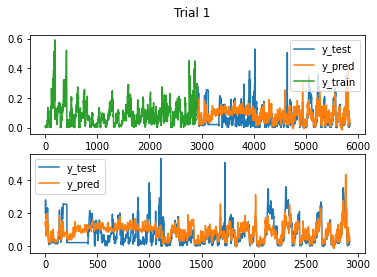

In [ ]:
plt.subplot(2,1, 1)
plt.plot(np.arange(len(ypred1)) + len(ytrain1),ytest1)
plt.plot(np.arange(len(ypred1)) + len(ytrain1), ypred1)
plt.plot(ytrain1)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred', 'y_train'])

plt.subplot(2,1,2)
#plot the predicted values
plt.plot(np.arange(len(ypred1)),ytest1)
plt.plot(np.arange(len(ypred1)), ypred1)

# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred'])

plt.suptitle("Trial 1")
plt.show()

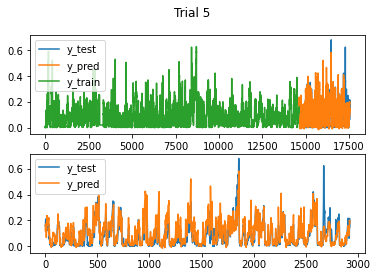

In [ ]:
plt.subplot(2,1, 1)
plt.plot(np.arange(len(ypred5)) + len(ytrain5),ytest5)
plt.plot(np.arange(len(ypred5)) + len(ytrain5), ypred5)
plt.plot(ytrain5)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred', 'y_train'])

plt.subplot(2,1,2)
#plot the predicted values
plt.plot(np.arange(len(ypred5)),ytest5)
plt.plot(np.arange(len(ypred5)), ypred5)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred'])

plt.suptitle('Trial 5')
plt.show()

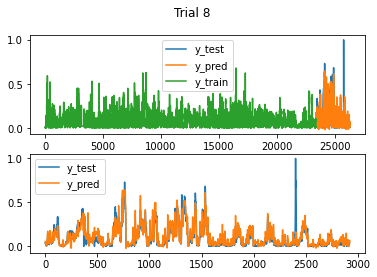

In [ ]:
#trial 8
plt.subplot(2,1, 1)
plt.plot(np.arange(len(ypred8)) + len(ytrain8),ytest8)
plt.plot(np.arange(len(ypred8)) + len(ytrain8), ypred8)
plt.plot(ytrain8)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred', 'y_train'])

plt.subplot(2,1,2)
#plot the predicted values
plt.plot(np.arange(len(ypred8)),ytest8)
plt.plot(np.arange(len(ypred8)), ypred8)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred'])

plt.suptitle('Trial 8')
plt.show()

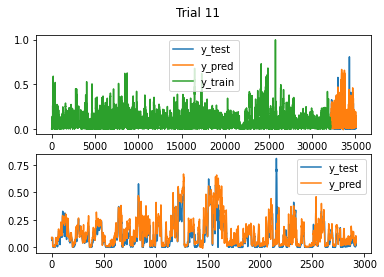

In [ ]:
#trial 11
plt.subplot(2,1, 1)
plt.plot(np.arange(len(ypred11)) + len(ytrain11),ytest11)
plt.plot(np.arange(len(ypred11)) + len(ytrain11), ypred11)
plt.plot(ytrain11)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred', 'y_train'])

plt.subplot(2,1,2)
#plot the predicted values
plt.plot(np.arange(len(ypred11)),ytest11)
plt.plot(np.arange(len(ypred11)), ypred11)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_pred'])

plt.suptitle('Trial 11')
plt.show()

### Residual Analysis
A residual plot with QQplot on the right side.


In [ ]:
#residuals vs 
residual_1 = ytest1 - ypred1.reshape(-1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"


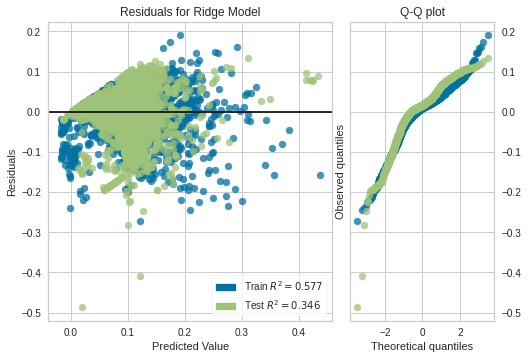

In [ ]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(model,hist = False,qqplot=True)

visualizer.fit(xtrain1, ytrain1)  # Fit the training data to the visualizer
visualizer.score(xtest1, ytest1)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure